In [16]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Visual inspection

In [72]:
def f(x):
    return x**3 - 10*x**2 + 5

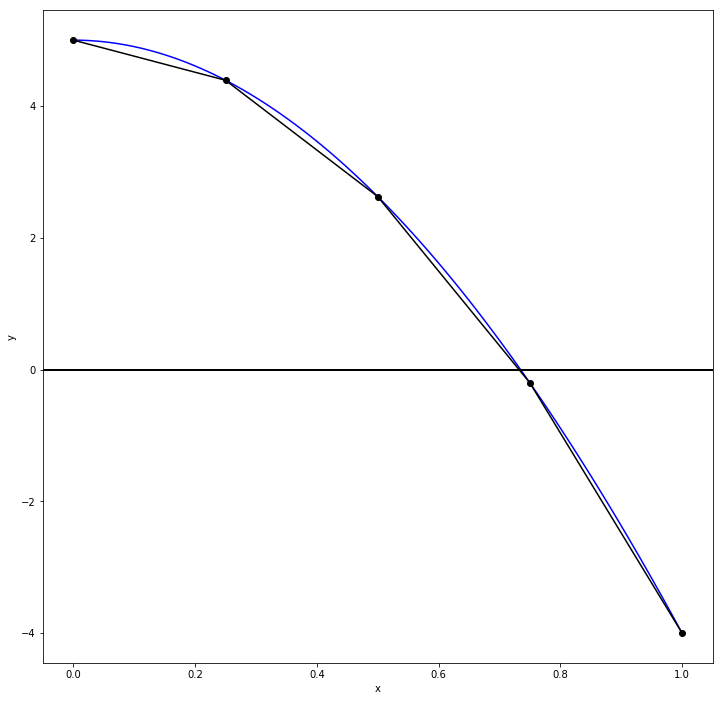

In [54]:
def VisualInspection(ax, f, a, b, dx, **kwargs):
    x = np.arange(a,b+dx,dx)
    y = f(x)
    plt.plot(x, y, **kwargs)
    plt.xlabel('x')
    plt.ylabel('y')
    ax.axhline(0, color='black', lw=2)

fig, ax = plt.subplots(figsize=(12, 12))
VisualInspection(ax, f, 0, 1, 0.01, color="blue", linestyle="-")
VisualInspection(ax, f, 0, 1, 0.25, color="black", linestyle="-", marker="o")

# Root Search algorithm

In [55]:
from numpy import sign
def rootsearch(f,a,b,dx):
    x1 = a; f1 = f(a)
    x2 = a + dx; f2 = f(x2)
    while sign(f1) == sign(f2):
        if x1 >= b: return None,None
        x1 = x2; f1 = f2
        x2 = x1 + dx; f2 = f(x2)
    else:
        return x1,x2

In [56]:
rootsearch(f,0.0,1.0, 1e-4)

(0.7345999999999354, 0.7346999999999354)

# bisection algorithm

In [57]:
from numpy import sign
import math
def bisection(f,x1,x2,switch=1,tol=1.0e-9, printN=False):
    f1 = f(x1)
    if f1 == 0.0: return x1
    f2 = f(x2)
    if f2 == 0.0: return x2
    if sign(f1) == sign(f2):
        raise Exception('Root is not bracketed')
    n = int(math.ceil(math.log(abs(x2 - x1)/tol)/math.log(2.0)))
    if(printN):print("n=",n)
    
    for i in range(n):
        x3 = 0.5*(x1 + x2); f3 = f(x3)
        if (switch == 1) and (abs(f3) > abs(f1)) \
                         and (abs(f3) > abs(f2)):
            return None   
        if f3 == 0.0: return x3
        if sign(f2)!= sign(f3): x1 = x3; f1 = f3
        else: x2 = x3; f2 = f3
    return (x1 + x2)/2.0

In [58]:
bisection(f,0.0,1.0, 0, tol=1e-4, printN=True)

n= 14


0.734588623046875

# Find all roots examples

In [69]:
def f2(x): 
    return x - np.tan(x)

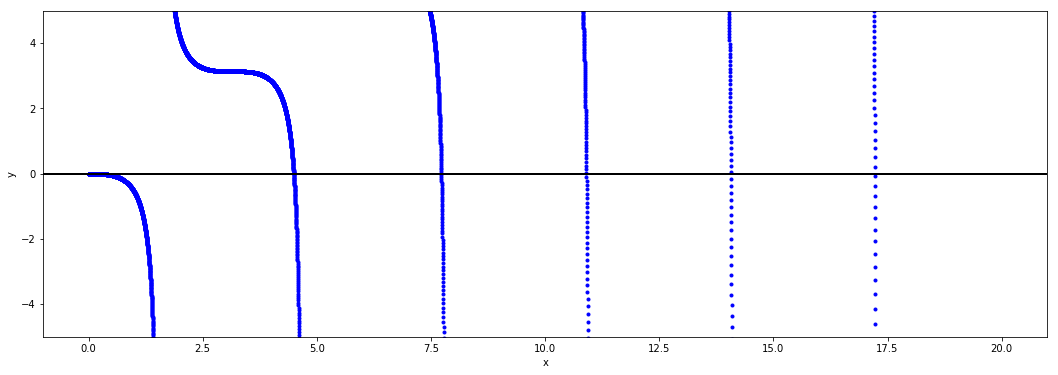

In [70]:
fig, ax = plt.subplots(figsize=(18, 6))
ax.set_ylim(-5,5)
VisualInspection(ax, f2, 0, 20, 0.001, color="blue", linestyle="", marker=".")

In [71]:
a,b,dx = (0.0, 20.0, 0.01)
print("The roots are:")
while True:
    x1,x2 = rootsearch(f2,a,b,dx)
    if x1 != None:
        a = x2
        root = bisection(f2,x1,x2,1)
        if root != None: print(root)
    else:
        print("\nDone")
        break

The roots are:
0.0
4.493409458100745
7.725251837074637
10.904121659695917
14.06619391292308
17.220755272209537

Done


# Ridder's method

In [75]:
def ridder(f,a,b,tol=1.0e-9):   
    fa = f(a)
    if fa == 0.0: return a
    fb = f(b)
    if fb == 0.0: return b
    if sign(fa) == sign(fb): raise Exception('Root is not bracketed')
    for i in range(30):
      # Compute the improved root x from Ridder's formula
        c = 0.5*(a + b); fc = f(c)
        s = math.sqrt(fc**2 - fa*fb)
        if s == 0.0: return None
        dx = (c - a)*fc/s
        if (fa - fb) < 0.0: dx = -dx 
        x = c + dx; fx = f(x)
      # Test for convergence
        if i > 0:
            if abs(x - xOld) < tol*max(abs(x),1.0): 
                print("number of iterations", i)
                return x
        xOld = x
      # Re-bracket the root as tightly as possible
        if sign(fc) == sign(fx): 
            if sign(fa)!= sign(fx): b = x; fb = fx
            else: a = x; fa = fx
        else:
            a = c; b = x; fa = fc; fb = fx
    return None
    print('Too many iterations')

In [76]:
ridder(f,0.0,1.0, tol=1e-4)

number of iterations 3


0.7346035078749871

## Newton raphson

In [84]:
def newtonRaphson(f,df,a,b,tol=1.0e-9, sequences=None):    
    fa = f(a)
    if fa == 0.0: return a
    fb = f(b)
    if fb == 0.0: return b
    if sign(fa) == sign(fb): raise Exception('Root is not bracketed')
    x = 0.5*(a + b)    
    
    if(sequences is not None):sequences.append(x)
    for i in range(30):
        fx = f(x)
        if fx == 0.0: return x
      # Tighten the brackets on the root 
        if sign(fa) != sign(fx): b = x  
        else: a = x
      # Try a Newton-Raphson step    
        dfx = df(x)
      # If division by zero, push x out of bounds
        try: dx = -fx/dfx
        except ZeroDivisionError: dx = b - a
        x = x + dx
      # If the result is outside the brackets, use bisection  
        if (b - x)*(x - a) < 0.0:  
            dx = 0.5*(b - a)                      
            x = a + dx
        
      # add the new x to the sequence  
        if(sequences is not None): sequences.append(x)
            
      # Check for convergence     
        if abs(dx) < tol*max(abs(b),1.0): 
            print("number of iteration",i)
            return x
    print('Too many iterations in Newton-Raphson')

In [77]:
def f(x):
    return x**3 - 10*x**2 + 5
def df(x):
    return 3*x**2 - 20*x

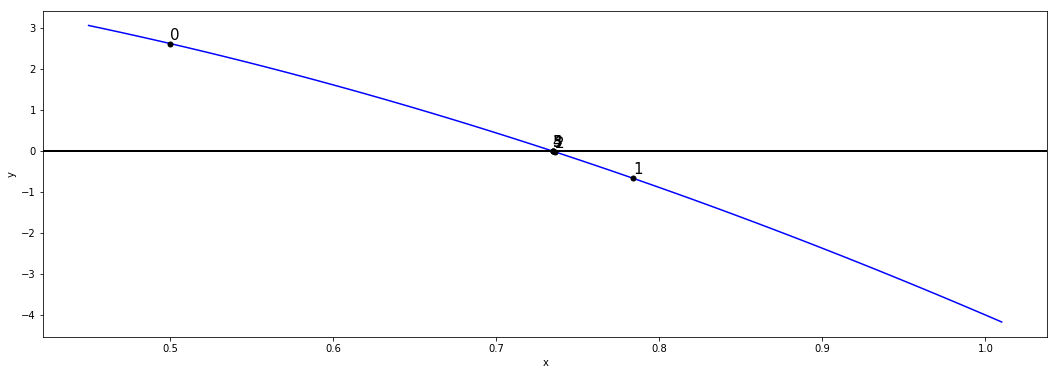

In [98]:
sequences = []
root = newtonRaphson(f,df,0,1,tol=1.0e-9, sequences=sequences)
print(root)

fig, ax = plt.subplots(figsize=(18, 6))
VisualInspection(ax, f, 0.45, 1, 0.01, color="blue", linestyle="-")
ax.axhline(0, color='black', lw=2)
x = np.array(sequences)
y = f(x)
plt.plot(x, y, "o", color="black", markersize=5)
for i in range(len(x)):
    ax.annotate("%d" % i, xy=(x[i], y[i]), xytext=(x[i], y[i]+0.1), fontsize=15 )



## Newton raphson for sqrt(2)

In [99]:
def f(x):
    return x**2 - 2
def df(x):
    return 2*x

number of iteration 4
1.4142135623730951


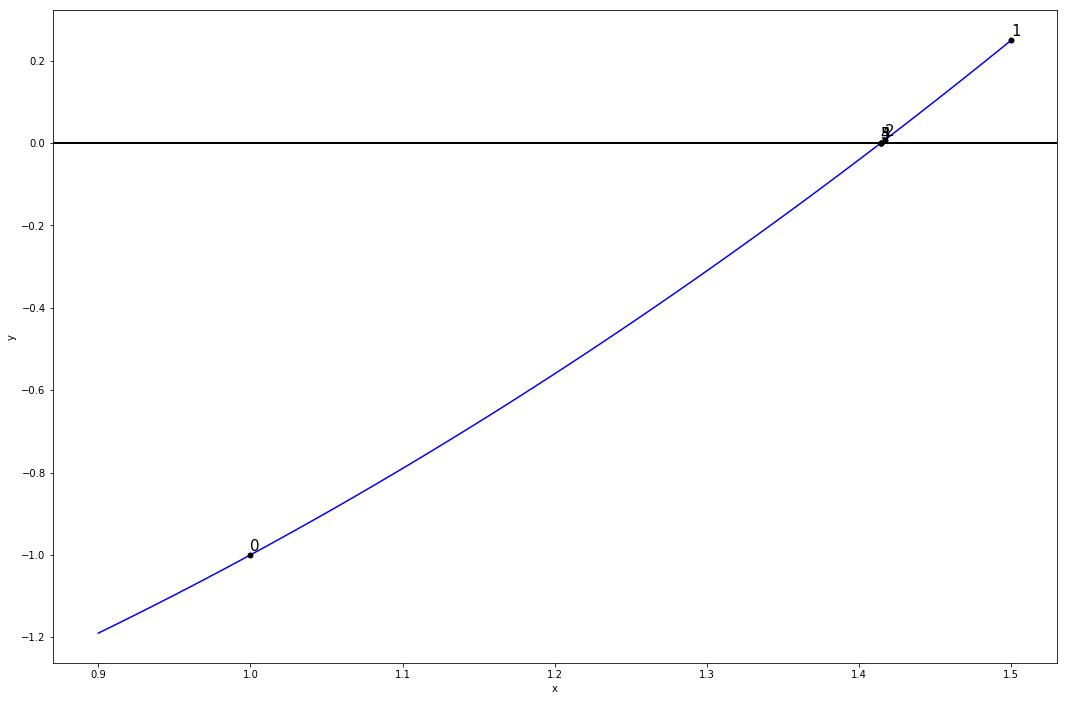

In [106]:
sequences = []
root = newtonRaphson(f,df,0,2,tol=1.0e-9, sequences=sequences)
print(root)

fig, ax = plt.subplots(figsize=(18, 12))
VisualInspection(ax, f, 0.9, 1.5, 0.01, color="blue", linestyle="-")
ax.axhline(0, color='black', lw=2)
x = np.array(sequences)
y = f(x)
plt.plot(x, y, "o", color="black", markersize=5)
for i in range(len(x)):
    ax.annotate("%d" % i, xy=(x[i], y[i]), xytext=(x[i], y[i]+0.01), fontsize=15 )



## Newton raphson in n-dimension

In [125]:
def newtonRaphson2(f,x,tol=1.0e-9, sequences=None):
    
    def swapRows(v,i,j):
        if len(v.shape) == 1:
            v[i],v[j] = v[j],v[i]
        else:
            v[[i,j],:] = v[[j,i],:]

    
    def gaussPivot(a,b,tol=1.0e-12):
        n = len(b)

      # Set up scale factors
        s = np.zeros(n)
        for i in range(n):
            s[i] = max(np.abs(a[i,:]))

        for k in range(0,n-1):

          # Row interchange, if needed
            p = np.argmax(np.abs(a[k:n,k])/s[k:n]) + k
            if abs(a[p,k]) < tol: raise Exception('Matrix is singular')
            if p != k:
                swapRows(b,k,p)
                swapRows(s,k,p)
                swapRows(a,k,p)

          # Elimination
            for i in range(k+1,n):
                if a[i,k] != 0.0:
                    lam = a[i,k]/a[k,k]
                    a[i,k+1:n] = a[i,k+1:n] - lam*a[k,k+1:n]
                    b[i] = b[i] - lam*b[k]
        if abs(a[n-1,n-1]) < tol: raise Exception('Matrix is singular')

      # Back substitution
        b[n-1] = b[n-1]/a[n-1,n-1]
        for k in range(n-2,-1,-1):
            b[k] = (b[k] - np.dot(a[k,k+1:n],b[k+1:n]))/a[k,k]
        return b    
    
    def jacobian(f,x):
        h = 1.0e-4
        n = len(x)
        jac = np.zeros((n,n))
        f0 = f(x)
        for i in range(n):
            temp = x[i]
            x[i] = temp + h
            f1 = f(x)
            x[i] = temp
            jac[:,i] = (f1 - f0)/h
        return jac,f0
    
    if(sequences is not None): sequences.append(x)    
    for i in range(30):
        jac,f0 = jacobian(f,x)
        if math.sqrt(np.dot(f0,f0)/len(x)) < tol:
            return x
        dx = gaussPivot(jac,-f0)
        x = x + dx
        if(sequences is not None): sequences.append(x)        
        if math.sqrt(np.dot(dx,dx)) < tol*max(max(abs(x)),1.0): return x
    print('Too many iterations')

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in sqrt
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in sqrt
  if sys.path[0] == '':


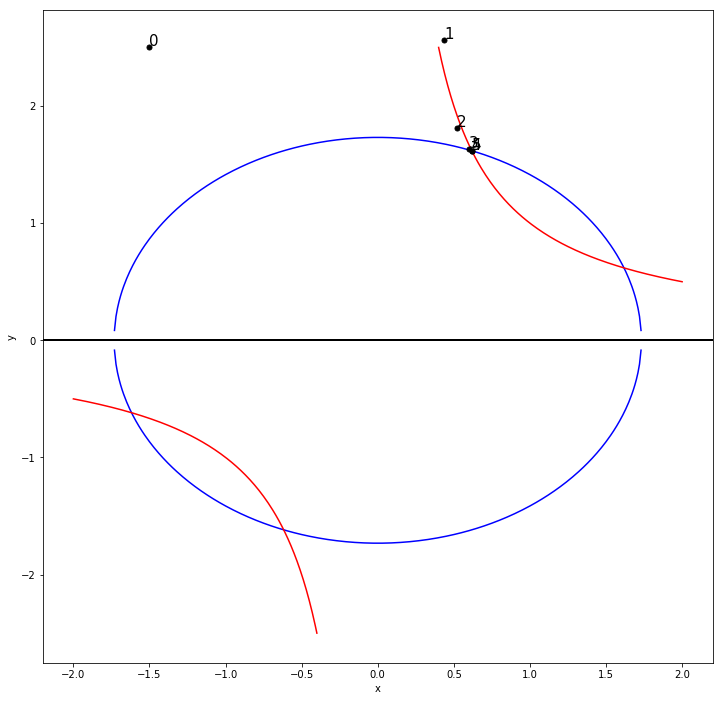

In [154]:
def f3(x):
    return np.array([
        x[0]**2 + x[1]**2 - 3,
        x[0]*x[1] - 1,
    ])

sequences = []
newtonRaphson2(f3, np.array([-1.5,2.5]), tol=1e-4, sequences = sequences)

fig, ax = plt.subplots(figsize=(12, 12))
VisualInspection(ax, lambda x0: np.sqrt(3-x0**2), -2.5, 2.5, 0.01, color="blue", linestyle="-")
VisualInspection(ax, lambda x0:-np.sqrt(3-x0**2), -2.5, 2.5, 0.01, color="blue", linestyle="-")
VisualInspection(ax, lambda x0:1.0/x0, 0.4, 2.0, 0.01, color="red", linestyle="-")
VisualInspection(ax, lambda x0:1.0/x0, -2.0, -0.4, 0.01, color="red", linestyle="-")

sequences = np.array(sequences)
plt.plot(sequences[:,0], sequences[:,1], "o", color="black", markersize=5)
for i in range(len(sequences)):
    ax.annotate("%d" % i, xy=(sequences[i,0], sequences[i,1]), xytext=(sequences[i,0], sequences[i,1]+0.01), fontsize=15 )



In [126]:
def f4(x):
    return np.array([
        np.sin(x[0]) + x[1]**2+np.log(x[2]) - 7,
        3*x[0] + 2**x[1] - x[2]**3 + 1,
        x[0] + x[1] +x[2] - 5,
    ])


In [127]:
sequences = []
newtonRaphson2(f4, np.array([1.0,1.0,1.0]), tol=1e-4, sequences = sequences)

array([0.599046  , 2.39594288, 2.00501113])

In [128]:
sequences

[array([1., 1., 1.]),
 array([-0.60333193,  3.42123054,  2.18210138]),
 array([0.46946441, 2.58957784, 1.94095775]),
 array([0.59282665, 2.40348226, 2.00369109]),
 array([0.599046  , 2.39594288, 2.00501113])]